# Focal operations

>Take into account the neighborhood (kernel, window), usually 3x3, by using an aggregation function

`scipy.ndimage` supplies
- minimum_filter
- maximum_filter
- uniform_filter
- median_filter

parameters:
- `size` - integer or tuple; or
- `footprint` - boolean array with window shape and identity of included elements
- `convolve` - applies the sum after multiplying by custom `weights`
- `generic_filter` - any custom function
- `mode` - for borders, one of `reflect`, `constant`, `nearest`, `mirror`, `wrap`

In [2]:
import scipy.ndimage
from helpers import src_elev, src_grain
import numpy as np
import os 
import rasterio
import rasterio.plot
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
elev = src_elev.read(1)
elev

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36]], dtype=uint8)

In [5]:
elev_min = scipy.ndimage.minimum_filter(elev, size=3)
elev_min

array([[ 1,  1,  2,  3,  4,  5],
       [ 1,  1,  2,  3,  4,  5],
       [ 7,  7,  8,  9, 10, 11],
       [13, 13, 14, 15, 16, 17],
       [19, 19, 20, 21, 22, 23],
       [25, 25, 26, 27, 28, 29]], dtype=uint8)

>to not extend the window beyond the array, wrap with `nan` values

In [6]:
elev_min = elev_min.astype(float)
elev_min[:, [0, -1]] = np.nan 
elev_min[[0, -1], :] = np.nan
elev_min

array([[nan, nan, nan, nan, nan, nan],
       [nan,  1.,  2.,  3.,  4., nan],
       [nan,  7.,  8.,  9., 10., nan],
       [nan, 13., 14., 15., 16., nan],
       [nan, 19., 20., 21., 22., nan],
       [nan, nan, nan, nan, nan, nan]])

>Using mode to calculate the most common value. There is no built-in scipy mode function, so use `generic_filter`

In [7]:
grain = src_grain.read(1)
grain

array([[1, 0, 1, 2, 2, 2],
       [0, 2, 0, 0, 2, 1],
       [0, 2, 2, 0, 0, 2],
       [0, 0, 1, 1, 1, 1],
       [1, 1, 1, 2, 1, 1],
       [2, 1, 2, 2, 0, 2]], dtype=uint8)

In [8]:
grain_mode = scipy.ndimage.generic_filter(
    grain, 
    lambda x: scipy.stats.mode(x.flatten())[0], size=3
)
grain_mode = grain_mode.astype(float)
grain_mode[:, [0, -1]] = np.nan
grain_mode[[0, -1], :] = np.nan
grain_mode

array([[nan, nan, nan, nan, nan, nan],
       [nan,  0.,  0.,  0.,  2., nan],
       [nan,  0.,  0.,  0.,  1., nan],
       [nan,  1.,  1.,  1.,  1., nan],
       [nan,  1.,  1.,  1.,  1., nan],
       [nan, nan, nan, nan, nan, nan]])

>Terrain processing
>
>- slope
>- aspect
>- curvature
>
>Supplied by Python packages such as `xarray`, `richdem`, `gdaldem` and `pysheds`

In [10]:
os.system('gdaldem slope ../output/srtm_32612.tif ../output/srtm_3261_slope.tif')

0...10...20...30...40...50...60...70...80...90...100 - done.


0

In [11]:
os.system('gdaldem aspect ../output/srtm_32612.tif ../output/srtm_3261_aspect.tif')

0...10...20...30...40...50...60...70...80...90...100 - done.


0

In [12]:
src_srtm = rasterio.open('../output/srtm_32612.tif')
srtm = src_srtm.read(1).astype(float)
srtm[srtm == src_srtm.nodata] = np.nan
src_srtm_slope = rasterio.open('../output/srtm_32612_slope.tif')
srtm_slope = src_srtm_slope.read(1).astype(float)
srtm_slope[srtm_slope == src_srtm_slope.nodata] = np.nan
src_srtm_aspect = rasterio.open('../output/srtm_32612_aspect.tif')
srtm_aspect = src_srtm_aspect.read(1).astype(float)
srtm_aspect[srtm_aspect == src_srtm_aspect.nodata] = np.nan

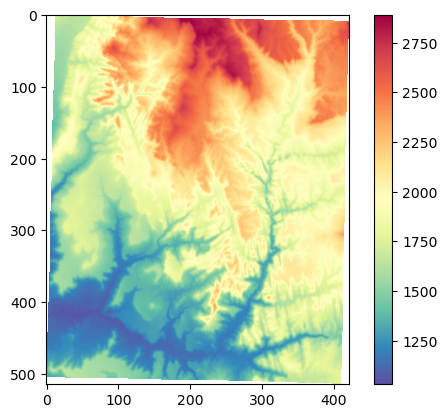

In [15]:
fig, ax = plt.subplots()
rasterio.plot.show(src_srtm, cmap='Spectral_r', ax=ax)
fig.colorbar(ax.imshow(srtm, cmap='Spectral_r'), ax=ax);

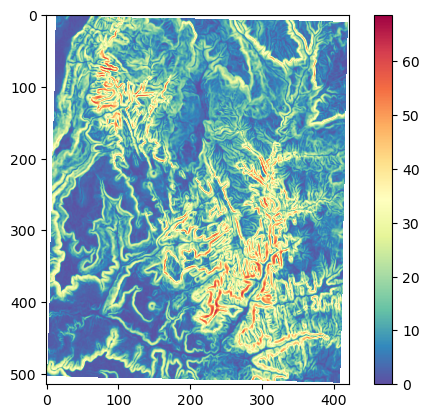

In [16]:
fig, ax = plt.subplots()
rasterio.plot.show(src_srtm_slope, cmap='Spectral_r', ax=ax)
fig.colorbar(ax.imshow(srtm_slope, cmap='Spectral_r'), ax=ax)

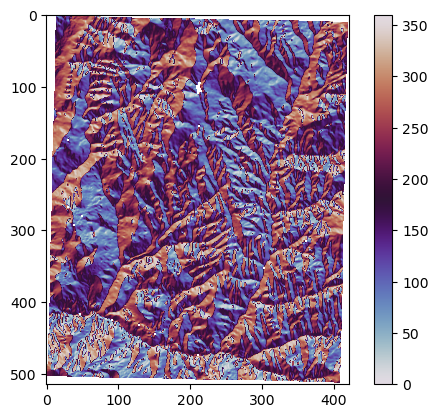

In [17]:
fig, ax = plt.subplots()
rasterio.plot.show(src_srtm_aspect, cmap='twilight', ax=ax)
fig.colorbar(ax.imshow(srtm_aspect, cmap='twilight'), ax=ax);